In [1]:
"""Import the model"""
from adtof.model.model import Model

model, hparams = Model.modelFactory(modelName="Frame_RNN", scenario="adtofAll", fold=0)
assert "peakThreshold" in hparams
assert model.weightLoadedFlag

2023-11-08 16:14:52.363485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""Transcribe any audio file."""

# Change the paths according to your configuration
audioFiles = "../../datasets/MDB Drums/audio/full_mix/*.wav"
outputLocation = "../../datasets/MDB Drums/estimations"
model.predictFolder(audioFiles, outputLocation, **hparams)


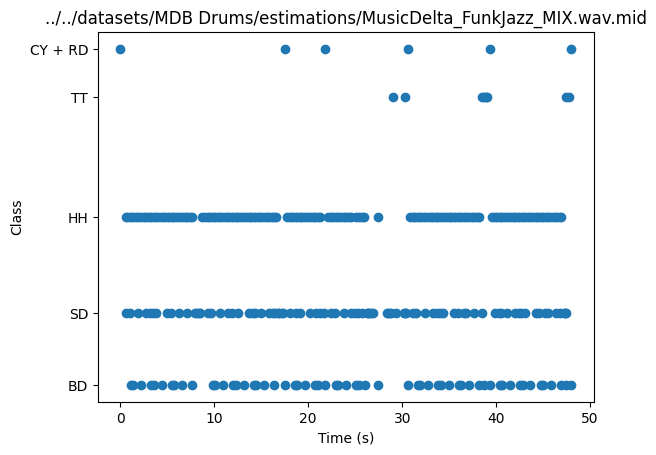

In [3]:
"""plot the estimated transcription"""
import pretty_midi
import glob
import matplotlib.pyplot as plt

for file in glob.glob(outputLocation+"/*.mid"):
    transcription = pretty_midi.PrettyMIDI(file)
    plt.scatter([note.start for note in transcription.instruments[0].notes], [note.pitch for note in transcription.instruments[0].notes])
    plt.yticks([35, 38, 42, 47, 49], ["BD", "SD", "HH", "TT", "CY + RD"])
    plt.title(file)
    plt.xlabel("Time (s)")
    plt.ylabel("Class")
    plt.show()
    break